OneCycleLR scheduler is a popular and widely used learning rate scheduler and it is based on a 2018 paper titled "Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates" (https://arxiv.org/abs/1708.07120)

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 100
STEPS = 20

In [3]:
def run_OneCycleLR(max_lr, div_factor, pct_start, return_result=False):
    steps = []
    lrs = []
    
    lr = max_lr
    model = torch.nn.Linear(10, 10)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer, 
        max_lr=max_lr,
        epochs=EPOCHS,
        steps_per_epoch=STEPS,
        div_factor=div_factor,
        pct_start=pct_start,
        anneal_strategy='cos'
    )
    
    for epoch in range(EPOCHS):
        for step in range(STEPS):
            optimizer.step()
            scheduler.step()
            lrs.append(scheduler.get_last_lr()[0])
            steps.append(epoch)
        
    plt.figure()
    plt.plot(steps, lrs)
    plt.xlabel("Num Steps")
    plt.ylabel("Learning Rate")
    plt.show()
    
    if return_result:
        return steps, lrs

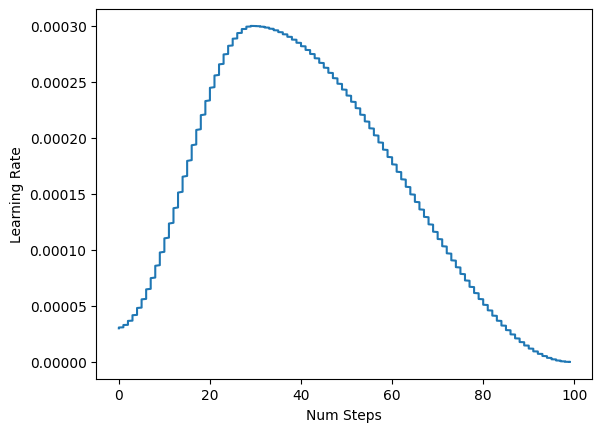

In [4]:
max_lr = 3e-4
div_factor = 10
pct_start = 0.3

steps, lrs = run_OneCycleLR(max_lr, div_factor, pct_start, return_result=True)

#### Note: <br>
• Scheduler **overwrites** the learning rate of the optimizer. This means when using scheduler, whichever learning rate you set for the optimizer, does not matter. <br>
• **max_lr, div_factor, pct_start** are the 3 most important hyperparameters for the OneCycleLR scheduler. <br>

• max_lr = it is the maximum learning rate. Scheduler does not update the learning rate beyond this value. <br>

• div_factor = it is used to calculate the initial_lr which is given by; initial_lr = max_lr/ div_factor. <br>

• pct_start = it is in range 0 to 1. e.g. if pct_start = 0.3, then it means that the scheduler will **increase** the learning rate and it reaches from initial_lr to max_lr in first 30% of the epochs. i.e at 30th percent, learning rate = max_lr. <br>
Then from 30% the learning rate starts decreasing and normally at some point it reaches to the initial learning rate and then it decrease even further.

(pct_start = 0.3 is the default value and most widely used. And normally, pct_start should **not** be greater than 0.5)

In [5]:
initial_lr = max_lr / div_factor
print(initial_lr)

2.9999999999999997e-05


In [6]:
maximum_lr = max(lrs)
maximum_lr_percent = lrs.index(max(lrs)) + 1
print((maximum_lr, maximum_lr_percent))

# Note at 30 % of the epoch (pct_start = 0.3), the learning rate has reached the max_lr

(0.0003, 599)


In [7]:
final_lr = min(lrs)
print(final_lr)

2.9999999999999996e-09


### Lets see the effect of choice of the hyperparameters: max_lr, div_factor, pct_start on the learning curve

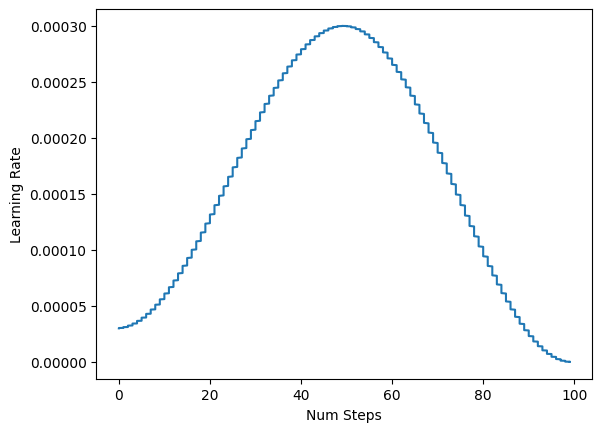

In [8]:
max_lr = 3e-4
div_factor = 10
pct_start = 0.5

run_OneCycleLR(max_lr, div_factor, pct_start)

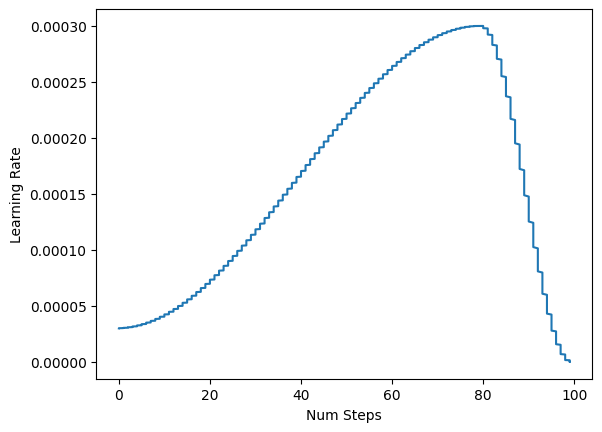

In [9]:
max_lr = 3e-4
div_factor = 10
pct_start = 0.8

run_OneCycleLR(max_lr, div_factor, pct_start)

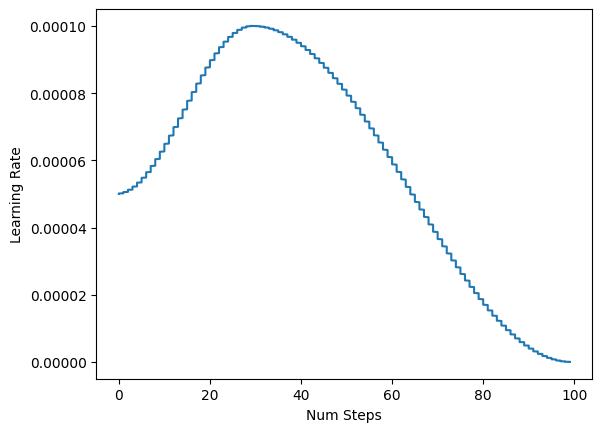

In [10]:
max_lr = 1e-4
div_factor = 2
pct_start = 0.3

run_OneCycleLR(max_lr, div_factor, pct_start)